In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.



  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0


In [119]:
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go
#Interval required 5 minutes
data = yf.download(tickers='GC=F', period='1d', interval='1m')
#Print data
data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-02-27 00:00:00-05:00,1815.900024,1816.400024,1815.800049,1816.199951,1816.199951,0
2023-02-27 00:01:00-05:00,1816.099976,1816.099976,1815.900024,1815.900024,1815.900024,19
2023-02-27 00:02:00-05:00,1816.000000,1816.099976,1815.900024,1816.000000,1816.000000,23
2023-02-27 00:03:00-05:00,1815.900024,1815.900024,1815.300049,1815.300049,1815.300049,15
2023-02-27 00:04:00-05:00,1815.400024,1815.599976,1815.400024,1815.599976,1815.599976,19
...,...,...,...,...,...,...
2023-02-27 12:36:00-05:00,1825.099976,1825.300049,1824.900024,1824.900024,1824.900024,84
2023-02-27 12:37:00-05:00,1824.800049,1825.400024,1824.800049,1825.300049,1825.300049,116
2023-02-27 12:38:00-05:00,1825.199951,1825.400024,1825.099976,1825.400024,1825.400024,40


In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2023-02-27 00:00:00-05:00 to 2023-02-27 12:40:00-05:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       752 non-null    float64
 1   High       752 non-null    float64
 2   Low        752 non-null    float64
 3   Close      752 non-null    float64
 4   Adj Close  752 non-null    float64
 5   Volume     752 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.1 KB


In [122]:
# Dataset Values(Max, min, std..)
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,1819.056783,1819.332316,1818.825662,1819.069549,1819.069549,120.706117
std,3.153824,3.209849,3.112611,3.157960,3.157960,138.921996
min,1814.000000,1814.599976,1813.900024,1814.099976,1814.099976,0.000000
25%,1816.300049,1816.599976,1816.099976,1816.400024,1816.400024,37.750000
50%,1818.300049,1818.599976,1818.099976,1818.300049,1818.300049,74.000000
75%,1821.724976,1822.199951,1821.500000,1821.800049,1821.800049,152.250000
max,1826.699951,1826.900024,1826.199951,1826.699951,1826.699951,1236.000000


In [123]:
# Data Correlation: Relationship between columns
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.996683,0.996899,0.993221,0.993221,0.430569
High,0.996683,1.000000,0.996378,0.997075,0.997075,0.454599
Low,0.996899,0.996378,1.000000,0.997142,0.997142,0.413128
Close,0.993221,0.997075,0.997142,1.000000,1.000000,0.435560
Adj Close,0.993221,0.997075,0.997142,1.000000,1.000000,0.435560
Volume,0.430569,0.454599,0.413128,0.435560,0.435560,1.000000


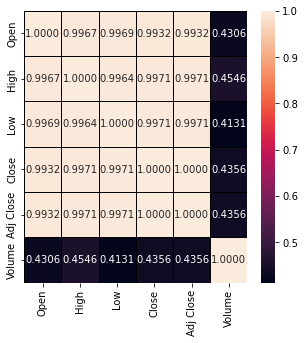

In [124]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(data.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

In [125]:
data_set = data.loc[:, ["Open"]].values
data_set

array([[1815.90002441],
       [1816.09997559],
       [1816.        ],
       [1815.90002441],
       [1815.40002441],
       [1815.69995117],
       [1815.80004883],
       [1815.90002441],
       [1815.90002441],
       [1815.5       ],
       [1815.59997559],
       [1815.40002441],
       [1815.5       ],
       [1815.40002441],
       [1815.5       ],
       [1815.59997559],
       [1815.59997559],
       [1815.40002441],
       [1815.5       ],
       [1815.59997559],
       [1815.40002441],
       [1814.90002441],
       [1814.69995117],
       [1814.69995117],
       [1814.        ],
       [1814.59997559],
       [1814.69995117],
       [1815.        ],
       [1814.90002441],
       [1814.5       ],
       [1814.80004883],
       [1814.90002441],
       [1815.19995117],
       [1814.90002441],
       [1814.69995117],
       [1814.5       ],
       [1814.80004883],
       [1815.        ],
       [1815.09997559],
       [1815.09997559],
       [1815.59997559],
       [1815.300

In [126]:
train = data_set[:len(data_set) - 50]
test = data_set[len(train):]

train.reshape(train.shape[0],1)
train.shape

(702, 1)

In [127]:
# Normalization wiht MinmaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1)) # değerleri 0 ile 1 arasında sayılara indirger
train_scaler = scaler.fit_transform(train)
train_scaler

array([[0.1496088 ],
       [0.16535304],
       [0.15748092],
       [0.1496088 ],
       [0.11023857],
       [0.13385494],
       [0.14173667],
       [0.1496088 ],
       [0.1496088 ],
       [0.11811069],
       [0.12598281],
       [0.11023857],
       [0.11811069],
       [0.11023857],
       [0.11811069],
       [0.12598281],
       [0.12598281],
       [0.11023857],
       [0.11811069],
       [0.12598281],
       [0.11023857],
       [0.07086834],
       [0.05511448],
       [0.05511448],
       [0.        ],
       [0.04724235],
       [0.05511448],
       [0.07874046],
       [0.07086834],
       [0.03937023],
       [0.06299621],
       [0.07086834],
       [0.09448471],
       [0.07086834],
       [0.05511448],
       [0.03937023],
       [0.06299621],
       [0.07874046],
       [0.08661258],
       [0.08661258],
       [0.12598281],
       [0.10236644],
       [0.09448471],
       [0.10236644],
       [0.14173667],
       [0.12598281],
       [0.13385494],
       [0.149

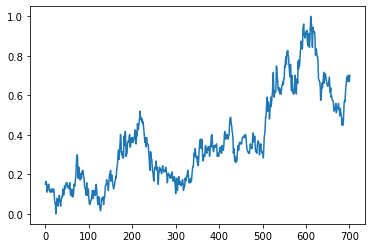

In [128]:
plt.plot(train_scaler)
plt.show()


In [129]:
X_train = []
Y_train = []
timesteps = 50

for i in range(timesteps, len(train_scaler)):
    X_train.append(train_scaler[i - timesteps:i, 0])
    Y_train.append(train_scaler[i,0])
    
X_train, Y_train = np.array(X_train), np.array(Y_train)

# reshape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [130]:
X_train.shape

(652, 50, 1)

In [131]:
X_train

array([[[0.1496088 ],
        [0.16535304],
        [0.15748092],
        ...,
        [0.1496088 ],
        [0.15748092],
        [0.15748092]],

       [[0.16535304],
        [0.15748092],
        [0.1496088 ],
        ...,
        [0.15748092],
        [0.15748092],
        [0.15748092]],

       [[0.15748092],
        [0.1496088 ],
        [0.11023857],
        ...,
        [0.15748092],
        [0.15748092],
        [0.13385494]],

       ...,

       [[0.65354966],
        [0.64566793],
        [0.64566793],
        ...,
        [0.66929391],
        [0.70079202],
        [0.68503816]],

       [[0.64566793],
        [0.64566793],
        [0.66142179],
        ...,
        [0.70079202],
        [0.68503816],
        [0.67716604]],

       [[0.64566793],
        [0.66142179],
        [0.67716604],
        ...,
        [0.68503816],
        [0.67716604],
        [0.66929391]]])

In [132]:
Y_train

array([0.15748092, 0.13385494, 0.14173667, 0.14173667, 0.14173667,
       0.12598281, 0.15748092, 0.11811069, 0.09448471, 0.09448471,
       0.10236644, 0.12598281, 0.08661258, 0.10236644, 0.08661258,
       0.11023857, 0.1496088 , 0.14173667, 0.14173667, 0.17322517,
       0.18897903, 0.2440935 , 0.28346373, 0.29921759, 0.29133586,
       0.1811069 , 0.2125954 , 0.23622138, 0.18897903, 0.17322517,
       0.17322517, 0.17322517, 0.20472327, 0.1811069 , 0.2125954 ,
       0.2125954 , 0.22047713, 0.2125954 , 0.18897903, 0.1811069 ,
       0.14173667, 0.13385494, 0.12598281, 0.11023857, 0.09448471,
       0.15748092, 0.11023857, 0.09448471, 0.12598281, 0.12598281,
       0.07874046, 0.05511448, 0.04724235, 0.05511448, 0.06299621,
       0.07086834, 0.07086834, 0.09448471, 0.11811069, 0.11023857,
       0.07874046, 0.10236644, 0.11811069, 0.09448471, 0.10236644,
       0.09448471, 0.14173667, 0.1496088 , 0.12598281, 0.09448471,
       0.06299621, 0.04724235, 0.06299621, 0.08661258, 0.05511

In [133]:
# Import Library 
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

# Initialising the RNN
regressor = Sequential()

# Add the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

# Third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

# Fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Add the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = "adam", loss = "mean_squared_error")

# Fitting the RNN to the training set
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
21/21 [==============================] - 4s 23ms/step - loss: 0.5251
Epoch 2/100
21/21 [==============================] - 0s 23ms/step - loss: 0.3449
Epoch 3/100
21/21 [==============================] - 0s 20ms/step - loss: 0.2513
Epoch 4/100
21/21 [==============================] - 0s 20ms/step - loss: 0.2314
Epoch 5/100
21/21 [==============================] - 1s 24ms/step - loss: 0.1964
Epoch 6/100
21/21 [==============================] - 1s 28ms/step - loss: 0.1840
Epoch 7/100
21/21 [==============================] - 1s 26ms/step - loss: 0.1456
Epoch 8/100
21/21 [==============================] - 1s 25ms/step - loss: 0.1211
Epoch 9/100
21/21 [==============================] - 1s 25ms/step - loss: 0.1199
Epoch 10/100
21/21 [==============================] - 1s 27ms/step - loss: 0.0950
Epoch 11/100
21/21 [==============================] - 1s 27ms/step - loss: 0.0930
Epoch 12/100
21/21 [==============================] - 1s 27ms/step - loss: 0.0860
Epoch 13/100
21/21 [=====

In [26]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [134]:
inputs = data_set[len(data_set) - len(test) - timesteps:]
inputs = scaler.transform(inputs)

In [135]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i - timesteps:i, 0])
    
X_test_rnn = np.array(X_test)
X_test_rnn = np.reshape(X_test_rnn, (X_test_rnn.shape[0], X_test_rnn.shape[1], 1))
predicted_stock_price = regressor.predict(X_test_rnn)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

2/2 [==============================] - 1s 11ms/step


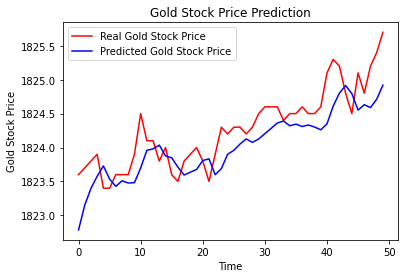

In [149]:
# visualising the results
plt.plot(test, color = "red", label = "Real Gold Stock Price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Gold Stock Price")
plt.title("Gold Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Gold Stock Price")
plt.legend()
plt.show()

In [140]:
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

In [42]:
# Import Library For LSTM Model
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [144]:
# Prepare test dataset
testX = np.array(X_test)
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])

# Predict with testX
predict_lstm = model.predict(testX)
predict_lstm = scaler.inverse_transform(predict_lstm)

2/2 [==============================] - 0s 2ms/step


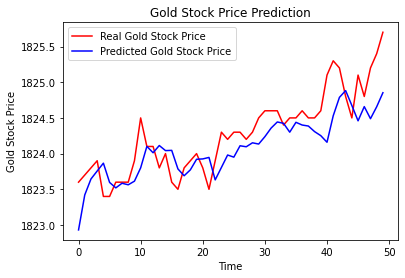

In [148]:
# visualising the results
plt.plot(test, color = "red", label = "Real Gold Stock Price")
plt.plot(predict_lstm, color = "blue", label = "Predicted Gold Stock Price")
plt.title("Gold Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Gold Stock Price")
plt.legend()
plt.show()

In [142]:
model = Sequential()
model.add(LSTM(10, input_shape = (1, timesteps)))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam")
model.fit(trainX, Y_train, epochs = 50, batch_size = 1)

Epoch 1/50
652/652 [==============================] - 4s 1ms/step - loss: 0.0079
Epoch 2/50
652/652 [==============================] - 1s 2ms/step - loss: 0.0035
Epoch 3/50
652/652 [==============================] - 1s 2ms/step - loss: 0.0026
Epoch 4/50
652/652 [==============================] - 1s 2ms/step - loss: 0.0024
Epoch 5/50
652/652 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 6/50
652/652 [==============================] - 1s 2ms/step - loss: 0.0020
Epoch 7/50
652/652 [==============================] - 1s 2ms/step - loss: 0.0019
Epoch 8/50
652/652 [==============================] - 1s 1ms/step - loss: 0.0019
Epoch 9/50
652/652 [==============================] - 1s 1ms/step - loss: 0.0017
Epoch 10/50
652/652 [==============================] - 1s 1ms/step - loss: 0.0017
Epoch 11/50
652/652 [==============================] - 1s 1ms/step - loss: 0.0017
Epoch 12/50
652/652 [==============================] - 1s 1ms/step - loss: 0.0018
Epoch 13/50
652/652 [====